<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/K_Means_Clustering_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unsupervised Learning: An Overview


**Definition:**

> Unsupervised learning is a machine learning paradigm where models are trained on data without explicit labels. Instead of being taught what to look for, these models learn inherent patterns or structures within the data on their own.

###Key Concepts:

**Clustering:**

> Goal: Group similar data points together based on certain features.
Common Algorithms: K-Means, Hierarchical clustering, DBSCAN.
Applications: Customer segmentation, Image compression.


**Dimensionality Reduction:**

> Goal: Reduce the number of random variables under consideration by obtaining a set of principal variables, while retaining as much variance as possible.
Common Algorithms: Principal Component Analysis (PCA), t-Distributed Stochastic Neighbor Embedding (t-SNE), Autoencoders.
Applications: Data visualization, Feature extraction.


**Association:**

> Goal: Discover interesting relations between variables in large datasets.
Common Algorithms: Apriori, Eclat.
Applications: Market basket analysis, Website recommendation.


**Density Estimation:**

> Goal: Determine the distribution of data within the dataset.
Common Techniques: Kernel Density Estimation, Gaussian Mixture Model.
Applications: Anomaly detection, Data generation.


**Advantages:**

> Can be used when labeled data is scarce or expensive to obtain.
Useful for initial exploration and understanding of the data.
Can lead to insights that might not be apparent with supervised approaches.


**Challenges:**

> Less straightforward than supervised learning; results can sometimes be hard to interpret.
Requires a larger amount of data to detect patterns effectively.
No straightforward metric for evaluation, as there are no true labels to validate against.

# K-Means_Clustering


### **K-Means Clustering: A Simple Explanation**

Imagine you have a bunch of marbles scattered on the floor, and you want to group them based on their colors, but you're blindfolded. K-Means is like having a friend who also can't see the colors but helps you group the marbles based on their proximity to each other.

**Step-by-step Process**:

1. **Initialization**:
   - Decide how many groups (clusters) you want (let's say K groups).
   - Randomly place K points (called 'centroids') on the area where the marbles are scattered.

2. **Assignment**:
   - For each marble, find out which centroid it is closest to. Assign the marble to that centroid's group.

3. **Update Centroids**:
   - Once all marbles are assigned, calculate the center point of the marbles in each group. This new center point becomes your updated centroid.

4. **Repeat**:
   - With the new centroids, repeat the assignment step and the update centroid step until the centroids don't move much anymore or a set number of iterations is reached.

**The Math Behind It**:

The goal of K-Means is to minimize the distance between points in the same cluster and maximize the distance between different clusters.



K-Means is like grouping marbles based on how close they are to each other. You keep adjusting your groups until you find the best way to group them. The "best" way is when the marbles are as close as possible to the center of their group and as far apart as possible from marbles in other groups.

##Simplified formula:

[wiki](https://en.wikipedia.org/wiki/K-means_clustering)

The objective of the K-Means algorithm is to minimize the within-cluster sum of squares (WCSS), which is the sum of the squared distances between each point and the centroid of its cluster.

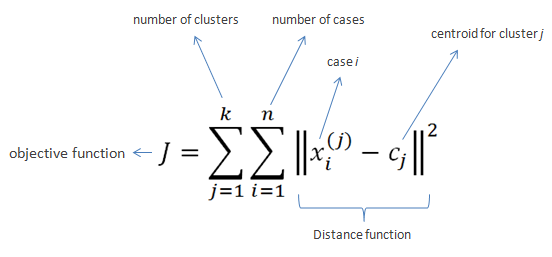

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(42)
data = np.vstack([np.random.randn(100, 2) * 0.75 + [3, 3],
                  np.random.randn(100, 2) * 0.5 + [0, 0],
                  np.random.randn(100, 2) * 0.6 + [1, 4]])

# Randomly initialize centroids
num_clusters = 3
centroids = data[np.random.choice(data.shape[0], num_clusters, replace=False)]

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def closest_centroid(point, centroids):
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    return np.argmin(distances)

plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red')
plt.title("Initial Centroids")
plt.show()

# K-Means algorithm
for step in range(10):  # let's run 10 iterations
    labels = [closest_centroid(point, centroids) for point in data]
    for i in range(num_clusters):
        centroids[i] = np.mean(data[np.array(labels) == i], axis=0)
    plt.scatter(data[:, 0], data[:, 1], c=labels, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red')
    plt.title(f"Iteration {step + 1}")
    plt.show()

print("Final Centroids:", centroids)



### Hard vs. Soft Clustering:

**1. Definition:**
- **Hard Clustering:** In this approach, each data point either belongs to a cluster completely or not. There's a clear-cut boundary, and every point belongs to one and only one cluster.
  - **Example:** In k-means clustering, each point is assigned to the nearest centroid, and it exclusively belongs to that one cluster.

- **Soft (or Fuzzy) Clustering:** Here, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. Each point can belong to multiple clusters with varying degrees of membership.
  - **Example:** Fuzzy C-Means clustering works on the principle of soft clustering. Each point has a degree of belonging to clusters, rather than belonging completely to one cluster.

**2. Use Cases:**
- **Hard Clustering:** Useful when the dataset has distinct separations, and there's a clear demarcation among the clusters.
- **Soft Clustering:** Useful when the structure of the data is overlapping, and it's essential to understand the degree of association rather than forcing an either-or categorization.

**3. Flexibility & Interpretability:**
- **Hard Clustering:** Easier to interpret as every data point is definitively categorized. However, it might not capture the nuances in more complex datasets.
- **Soft Clustering:** Offers more flexibility in representing the uncertainty of cluster assignments but can be more challenging to interpret due to the probabilistic nature of assignments.


In essence, the choice between hard and soft clustering often depends on the nature of your data and the specific problem you're trying to solve. Some scenarios clearly demand crisp boundaries (hard clustering), while others benefit from a more nuanced, probabilistic approach (soft clustering).